<a href="https://colab.research.google.com/github/HoshimMardonov/Data-Science-and-Artificial-intelligence/blob/main/classifier_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==2.5.3

In [2]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

1.10.2+cu102
2.5.3


In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!cd OIDv4_ToolKit && pip3 install -r requirements.txt

In [ ]:
!cd OIDv4_ToolKit && python main.py -h

In [5]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset ./content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 54249 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

In [6]:
from fastai.vision.all import *
from ipywidgets import widgets

path = Path("/content/OIDv4_ToolKit/OID/content/train")
# fls = get_image_files(path)
# failed = verify_images(path)
transport = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

dls = transport.dataloaders(path)

# dls.train.show_batch(max_n=32, nrows=4)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.334965,0.301385,0.900000,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.409649,0.244294,0.925000,00:13
1,0.292258,0.222043,0.933333,00:14
2,0.210415,0.234092,0.916667,00:13
3,0.162568,0.236059,0.900000,00:14


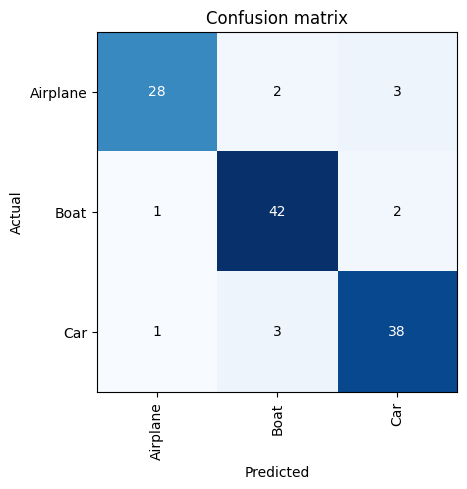

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

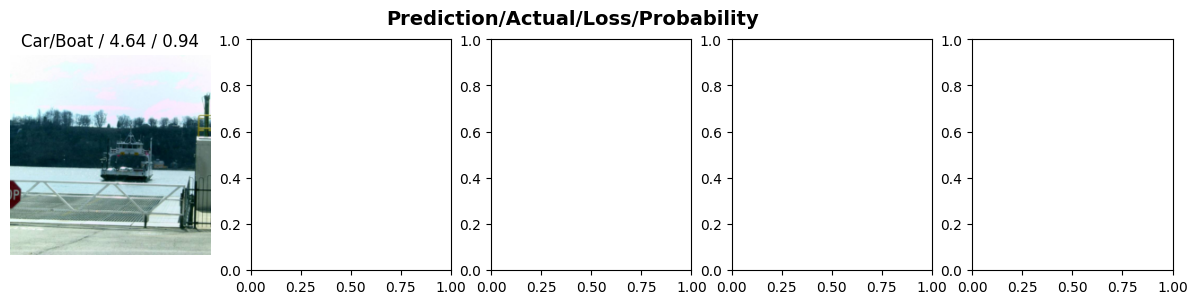

In [8]:
interp.plot_top_losses(5, nrows=1)


In [9]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Car
Ehtimolligi:100.0%


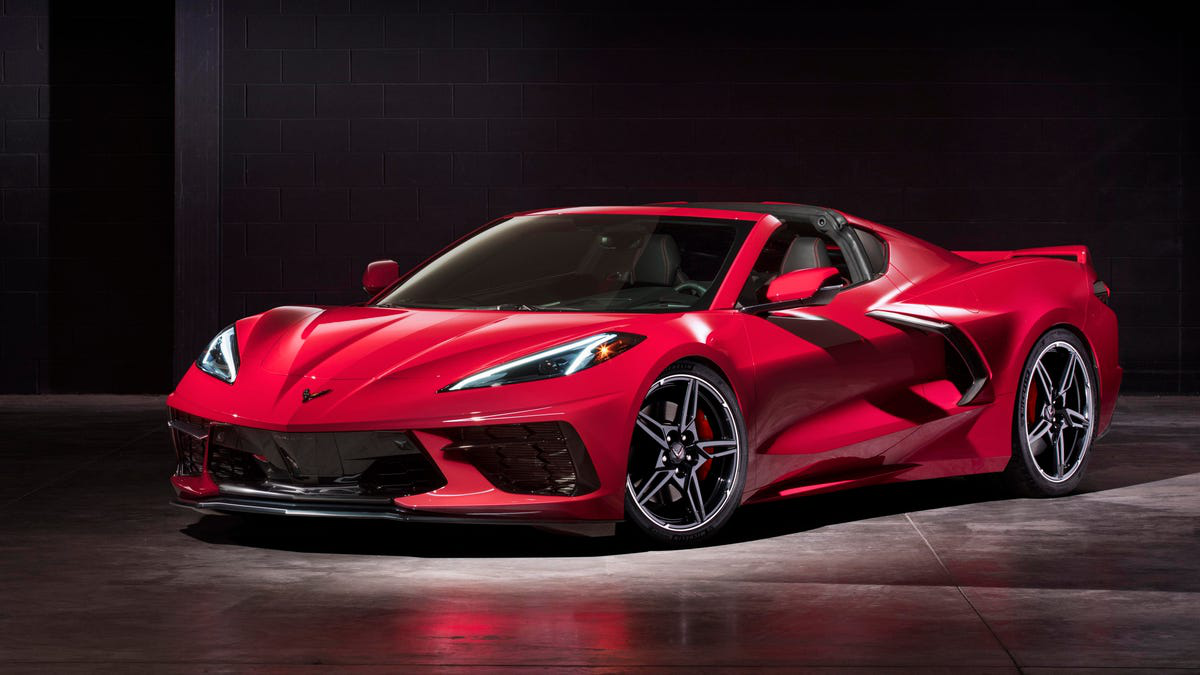

In [11]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Bashorat:{pred}')
print(f'Ehtimolligi:{probs[pred_id]*100:.1f}%')
img

In [12]:
learn.export("transport_model.pkl")